In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, InceptionV3, EfficientNetB0
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

In [2]:
from google.colab import files
files.upload()

Saving SpeciesCategorizedFishDataset.zip to SpeciesCategorizedFishDataset.zip


In [3]:
import zipfile

zip_path =  '/content/SpeciesCategorizedFishDataset.zip'
extract_path = "/content/fish_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [4]:
import os

# Show categories inside dataset
print(os.listdir(extract_path))

['test', 'train', 'val']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Only rescaling for test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
test_generator = test_datagen.flow_from_directory(
    '/content/fish_dataset/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 3187 images belonging to 11 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    '/content/fish_dataset/test',   # Make sure this is the correct path
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 3187 images belonging to 11 classes.


In [9]:
# Display the folder names (class labels)
class_labels = list(test_generator.class_indices.keys())

print("Detected Class Labels (Folder Names):")
for idx, label in enumerate(class_labels):
    print(f"{idx}: {label}")

Detected Class Labels (Folder Names):
0: animal fish
1: animal fish bass
2: fish sea_food black_sea_sprat
3: fish sea_food gilt_head_bream
4: fish sea_food hourse_mackerel
5: fish sea_food red_mullet
6: fish sea_food red_sea_bream
7: fish sea_food sea_bass
8: fish sea_food shrimp
9: fish sea_food striped_red_mullet
10: fish sea_food trout


###🔁 Data Augmentation for Train & Validation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split train folder into train/val
)

train_generator = train_datagen.flow_from_directory(
    '/content/fish_dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/fish_dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4984 images belonging to 11 classes.
Found 1241 images belonging to 11 classes.


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use this to get class_names correctly from the original training folder
datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
    '/content/fish_dataset/train',  # make sure this path matches your training folder
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical'
)

class_names = list(generator.class_indices.keys())


Found 6225 images belonging to 11 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save the model
cnn_model.save("cnn_fish_model.h5")

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 667s 4s/step - accuracy: 0.2695 - loss: 2.0847 - val_accuracy: 0.6180 - val_loss: 1.2183
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 673s 4s/step - accuracy: 0.5114 - loss: 1.3808 - val_accuracy: 0.6938 - val_loss: 0.9010
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 666s 4s/step - accuracy: 0.6199 - loss: 1.0636 - val_accuracy: 0.7518 - val_loss: 0.7552
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 665s 4s/step - accuracy: 0.6853 - loss: 0.9030 - val_accuracy: 0.8654 - val_loss: 0.4633
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 666s 4s/step - accuracy: 0.7565 - loss: 0.7191 - val_accuracy: 0.8324 - val_loss: 0.5685
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 660s 4s/step - accuracy: 0.7596 - loss: 0.6576 - val_accuracy: 0.9178 - val_loss: 0.3101
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 660s 4s/step - accuracy: 0.8254 - loss: 0.5303 - val_accuracy: 0.9130 - val_loss: 0.2965
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 675s 4s/step - accuracy: 0.8259 - loss: 0.5122 - val_accu

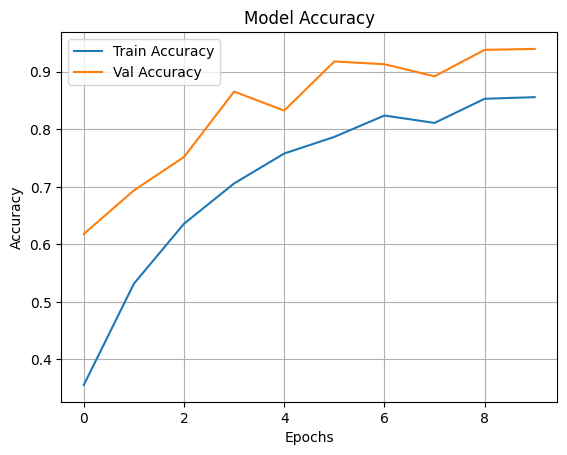

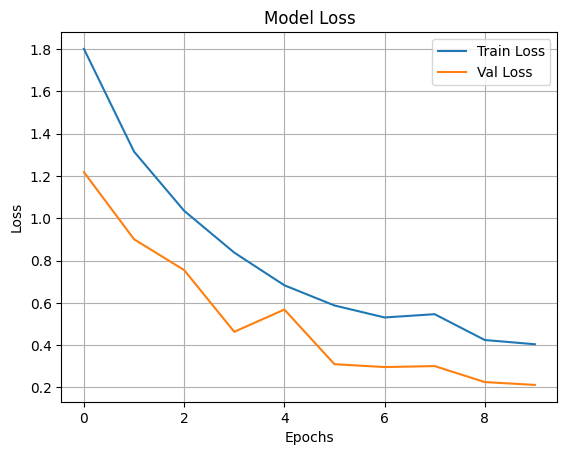

In [30]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import numpy as np

predictions = cnn_model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

3187/3187 ━━━━━━━━━━━━━━━━━━━━ 123s 39ms/step


In [16]:
import pandas as pd

results = pd.DataFrame({
    'Filename': test_generator.filenames,
    'Actual': [class_labels[i] for i in y_true],
    'Predicted': [class_labels[i] for i in y_pred]
})

results.head(10)  # Display top 10

,Filename,Actual,Predicted
0,animal fish/00ZR1T3Q2G5Z.jpg,animal fish,animal fish
1,animal fish/0982EFXJOXH9.jpg,animal fish,animal fish
2,animal fish/0AKFISD3OVLE.jpg,animal fish,animal fish
3,animal fish/0AUE3U3PPXVL.jpg,animal fish,animal fish
4,animal fish/0BJD9F3STSQ7.jpg,animal fish,animal fish
5,animal fish/0JESIL2U7PFG.jpg,animal fish,animal fish
6,animal fish/0JIAU5EUSBUU.jpg,animal fish,animal fish
7,animal fish/0JW3T28ZMSLG.jpg,animal fish,animal fish
8,animal fish/0KEIWNOMCIQU.jpg,animal fish,animal fish
9,animal fish/0NBI29HSVDH5.jpg,animal fish,animal fish


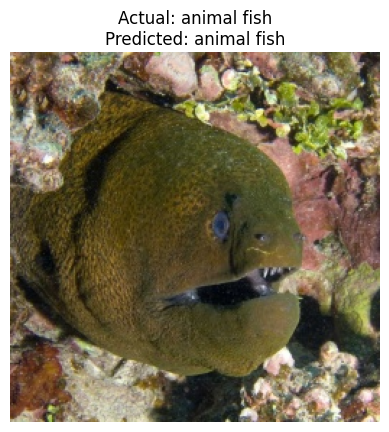

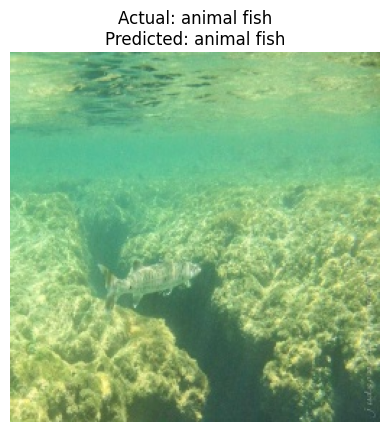

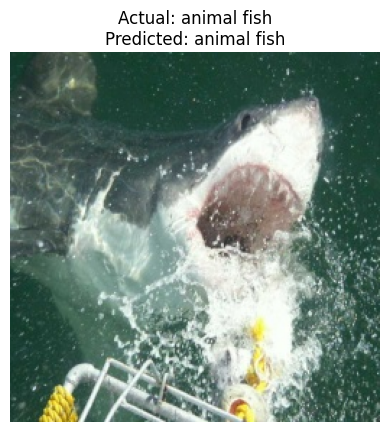

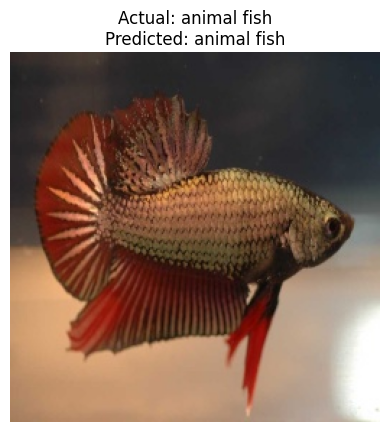

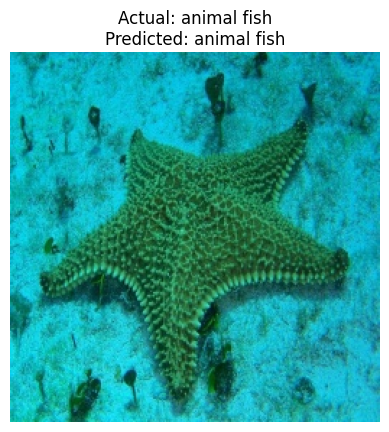

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(5):
    img_path = test_generator.filepaths[i]
    img = mpimg.imread(img_path)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {results['Actual'][i]}\nPredicted: {results['Predicted'][i]}")
    plt.show()

In [23]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
